In [2]:
import numpy as np

# The Normal Equation

In [3]:
np.random.seed(42)
m=100
X = 2 * np.random.rand(m,1)
y = 4+ 3*X+np.random.randn(m,1)

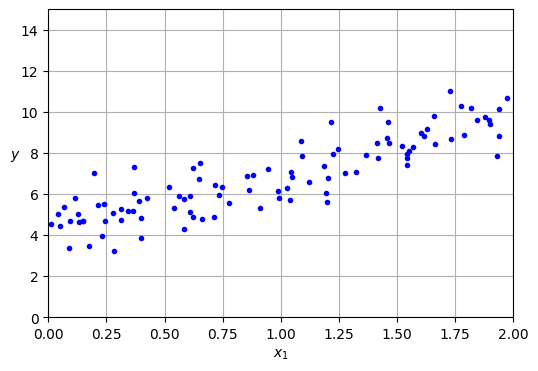

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.savefig("generated_data_plot")
plt.show()

In [5]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @y

In [6]:
theta_best


array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

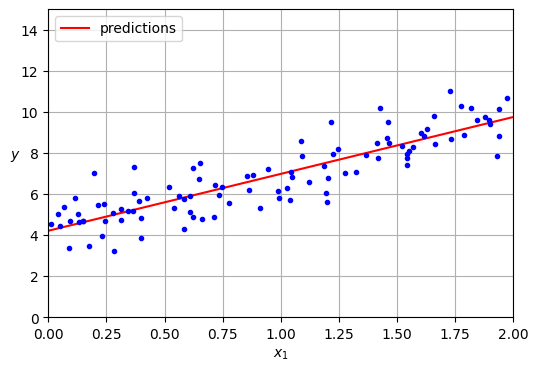

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize =(6,4))
plt.plot(X_new,y_predict,"r-",label="predictions")
plt.plot(X,y,"b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")
plt.savefig("linear_model_predictions_plot")

plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [11]:
theta_best_svd,residuals,rank,s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [12]:
np.linalg.pinv(X_b) @y

array([[4.21509616],
       [2.77011339]])

# Gradient Descent

## Batch Gradient Descent

In [13]:
eta = 0.1 
n_iterations = 1000
m = 100 

theta = np.random.rand(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [14]:
theta 

array([[4.21509616],
       [2.77011339]])

## Stochastic Gradient Descent

In [15]:
theta_path_sgd = []

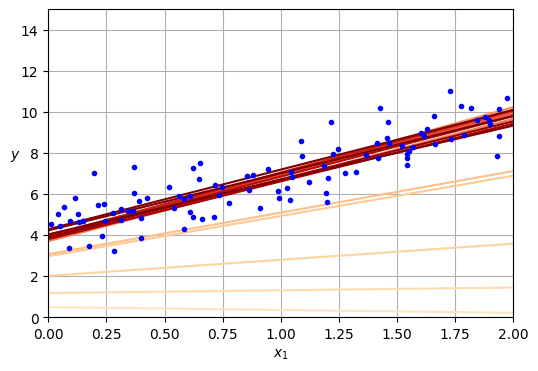

In [16]:

import matplotlib as mpl

n_epochs = 50
t0,t1 = 5,50

def learning_schedule(t):
    return t0/(t+t1)

np.random.seed(42)
theta =np.random.randn(2,1)

n_shown = 20
plt.figure(figsize = (6,4))


for epoch in range(n_epochs):
    for iteration in range(m):
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta 
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index +1]
        yi = y[random_index : random_index +1]
        gradients = 2*xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation =0)
plt.axis([0,2,0,15])
plt.grid()
plt.savefig("sgd_plot")
plt.show()

In [17]:
theta

array([[4.21076011],
       [2.74856079]])

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,tol = 1e-3,penalty=None,eta0 =0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [19]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.19984658]), array([2.73198364]))

## Mini Batch Gradient Descent

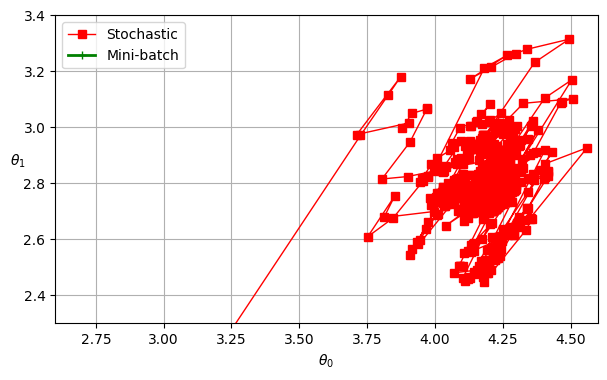

In [39]:
from math import ceil 

n_epochs = 50
minibatch_size = 20

n_batches_per_epoch = ceil(m/minibatch_size)

np.random.seed(42)
theta = np.random.randn(2,1) 
t0,t1 = 200,100

def learning_schedule(t): 
    return t0/ (t+t1)

theta_path_mgd=[]

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iterations in range(0,n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx: idx +minibatch_size]
        gradients = 2/minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta -eta * gradients
        theta_path_mgd.append(theta)

# theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd  = np.array(theta_path_mgd)

plt.figure(figsize = (7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"r-s",linewidth=1,label="Stochastic")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"g-+",linewidth=2,label="Mini-batch")
# plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],"b-o",linewidth=3,label="Batch")


plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$",rotation=0)
plt.axis([2.6,4.6,2.3,3.4])
plt.grid()
plt.savefig("gradient_descent_paths_plot")
plt.show()







# Polynomial Regression

In [23]:
np.random.seed(42)
m = 100
X= 6* np.random.rand(m,1)-3
y= 0.5 * X **2 + X+2 + np.random.randn(m,1)

[]

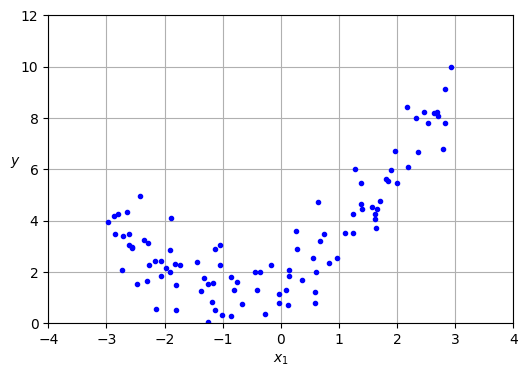

In [27]:
plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-4,4,0,12])
plt.grid()
plt.savefig("quadratic_data_plot")
plt.plot()

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree =2,include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

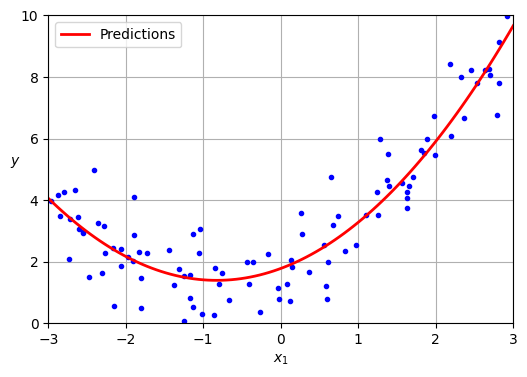

In [43]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r-",linewidth =2,label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.legend(loc="upper left")
plt.axis([-3,3,0,10])
plt.grid()
plt.savefig("quadratic_predictions_plot")
plt.show()

# Learning Curves

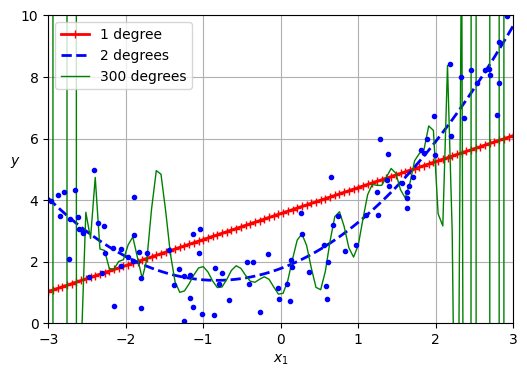

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize =(6,4))

for style ,width,degree in (("r-+",2,1),("b--",2,2),("g-",1,300)):
    polybig_features = PolynomialFeatures(degree=degree,include_bias =False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression= make_pipeline(polybig_features,std_scaler,lin_reg)
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new,y_newbig,style,label = label,linewidth=width)


plt.plot(X,y,"b.",linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.savefig("high_degree_polynomial_plot")
plt.show()

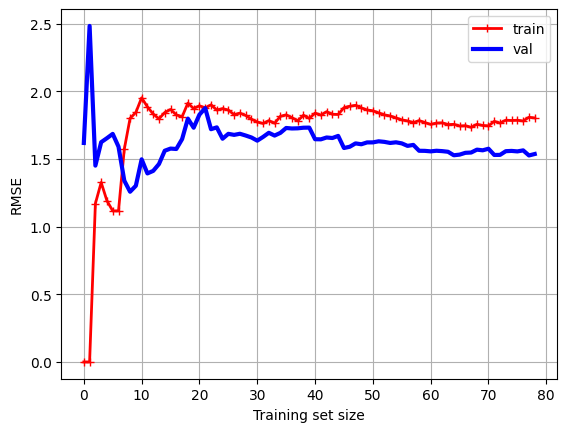

In [62]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split


def plot_learning_curve(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict  =model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.grid()
    plt.legend(loc="best")

lin_reg = LinearRegression()
plot_learning_curve(lin_reg,X,y)